![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

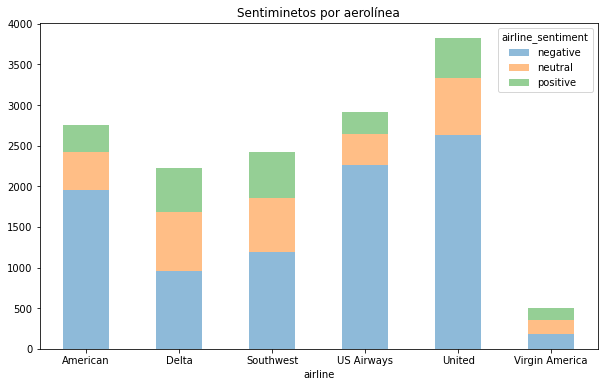

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
dict_score = {}
dict_score_arr = {}

def calc_accuracy(model, X_train, y_train, X_test, y_test, name):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    dict_score[name] = acc
    
    arr_acc = pd.Series(cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy"))
    dict_score_arr[name] = arr_acc


    print(arr_acc.describe())

In [12]:
# Celda 1
cv = CountVectorizer( lowercase = True, ngram_range=(3,3))

rf = RandomForestClassifier(n_estimators= 100, n_jobs=-1)

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

print(X_train_cv.shape)
print(X_test_cv.shape)


(9808, 122004)
(4832, 122004)


In [13]:
calc_accuracy(rf, X_train_cv, y_train, X_test_cv, y_test, "CountVect")

count    10.000000
mean      0.511011
std       0.017671
min       0.479592
25%       0.503058
50%       0.514271
75%       0.521152
max       0.536735
dtype: float64


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 2

# Celda 1
cv = CountVectorizer( lowercase = True, ngram_range=(3,3), stop_words="english")

rf = RandomForestClassifier(n_estimators= 100, n_jobs=-1)

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

print(X_train_cv.shape)
print(X_test_cv.shape)

#rf.fit(X_train_cv, y_train)
#y_pred = rf.predict(X_test_cv)



(9808, 68443)
(4832, 68443)


In [15]:
calc_accuracy(rf, X_train_cv, y_train, X_test_cv, y_test, "CountVec_stp")

count    10.000000
mean      0.296999
std       0.022074
min       0.268367
25%       0.285933
50%       0.289138
75%       0.305301
max       0.341488
dtype: float64


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
# Celda 3



rf = RandomForestClassifier(n_estimators= 100, n_jobs=-1)


wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos="v") for word in words]

cv = CountVectorizer( lowercase = True, ngram_range=(3,3),analyzer=split_into_lemmas)

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

print(X_train_cv.shape)
print(X_test_cv.shape)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(9808, 19380)
(4832, 19380)


In [17]:
calc_accuracy(rf, X_train_cv, y_train, X_test_cv, y_test, "CountVec_lemm")

count    10.000000
mean      0.736132
std       0.012134
min       0.719674
25%       0.728270
50%       0.734964
75%       0.739806
max       0.759429
dtype: float64


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
# Celda 4

rf = RandomForestClassifier(n_estimators= 100, n_jobs=-1)


wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos="v") for word in words]

cv = CountVectorizer( lowercase = True, ngram_range=(3,3),analyzer=split_into_lemmas, stop_words="english")

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

print(X_train_cv.shape)
print(X_test_cv.shape)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(9808, 19380)
(4832, 19380)


In [19]:
calc_accuracy(rf, X_train_cv, y_train, X_test_cv, y_test, "CountVec_stp_lemm")

count    10.000000
mean      0.738273
std       0.011998
min       0.716327
25%       0.733945
50%       0.738910
75%       0.742864
max       0.758410
dtype: float64


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

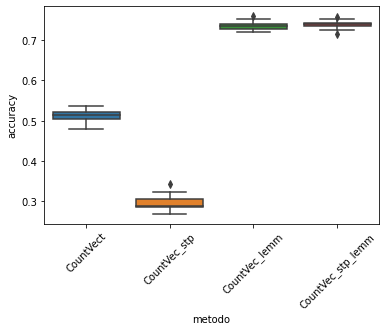

In [32]:
import seaborn as sns
#pd.DataFrame.from_dict(dict_score_arr)
sns.boxplot(data = pd.melt(pd.DataFrame.from_dict(dict_score_arr)), x="variable", y="value")


plt.xlabel('metodo')
plt.ylabel('accuracy')
plt.xticks(rotation=45);

,CountVect,CountVec_stp,CountVec_lemm,CountVec_stp_lemm
0,0.534768,0.297806,0.759313,0.760762


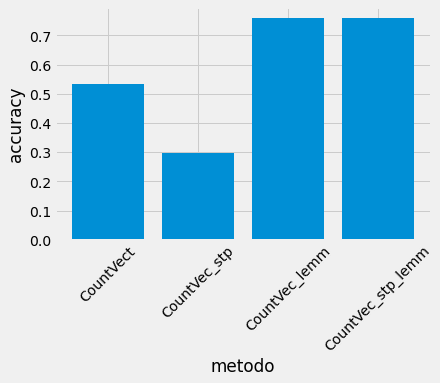

In [44]:
bar_data = pd.DataFrame(dict_score, index=[0])

display(bar_data)

plt.style.use('fivethirtyeight')
plt.bar(x=bar_data.columns, height=bar_data.values[0])

plt.xlabel('metodo')
plt.ylabel('accuracy')
plt.xticks(rotation=45);